# Merge gridded OCO-2 data and spatial basis functions into a single dataset

In [1]:
import pandas as pd
import xarray as xr


In [2]:
ds_landcover = xr.open_dataset("../data/intermediate/land_cover_north_america.nc4")
ds_oco2 = xr.open_dataset("../data/intermediate/OCO2_005deg_months2021_north_america.nc4")
ds_basis = (
    pd.read_csv("../data/intermediate/bisquares_basis.csv")
    .set_index(["lat", "lon"])
    .to_xarray()
    # coordinate values get adjusted by small decimal values in conversions from xarray,
    # pandas, R and back; refresh the basis coordinates here
    .assign_coords({"lat": ds_landcover["lat"].data, "lon": ds_landcover["lon"].data})
)

ds_grid = xr.merge([ds_oco2, ds_basis])
ds_grid


<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1200, time: 10)
Coordinates:
  * lat       (lat) float64 22.02 22.07 22.12 22.17 ... 57.82 57.87 57.92 57.97
  * lon       (lon) float64 -125.0 -124.9 -124.9 -124.8 ... -65.12 -65.07 -65.02
  * time      (time) datetime64[ns] 2021-02-01 2021-03-01 ... 2021-11-01
Data variables: (12/64)
    sif       (lat, lon, time) float32 ...
    sif_var   (lat, lon, time) float32 ...
    xco2      (lat, lon, time) float32 ...
    xco2_var  (lat, lon, time) float32 ...
    B1        (lat, lon) float64 1.0 1.0 0.9999 0.9997 ... 0.0 0.0 0.0 0.0
    B2        (lat, lon) float64 0.512 0.5181 0.5242 0.5303 ... 0.0 0.0 0.0 0.0
    ...        ...
    B55       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    B56       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    B57       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    B58       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    B59       (lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.5303 0.5242 0.5181 0.512
    B60       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9997 0.9999 1.0 1.0

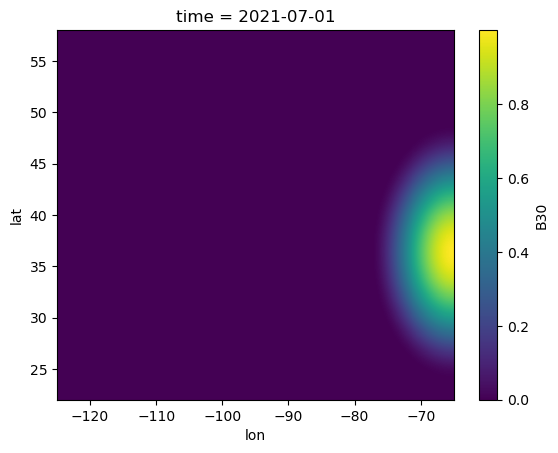

In [3]:
# quick check that basis functions are aligned
ds_grid.sel(time="2021-07").squeeze()["B30"].plot()


In [4]:
ds_grid.to_netcdf(
    "../data/intermediate/OCO2_005deg_months2021_north_america_with_basis.nc4", format="NETCDF4"
)
